In [15]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from numpy import ndarray
# Для метода максимального правдоподобия.
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [89]:
# Считываем данные из файла.
data = pd.read_csv('Cauchy.csv')
data[:5]

,-602.0
0,-598.19
1,-601.03
2,-598.07
3,-597.16
4,-597.95


In [31]:
# Как видим, одно из значений съехало в название столбца.(-602.0)
# Считаем данные в np.array.
X = list(data[data.columns[0]])
X.insert(0, -602.0)

In [36]:
X = np.array(X)

Нам нужно найти параметр сдвига в распределении Коши, методом максимального правдоподобия.

Посмотрим на наши данные.

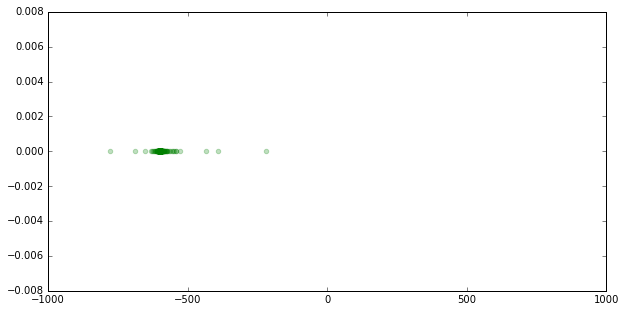

In [91]:
# Посмотрим на наши данные.
plt.figure(figsize=(10, 5))
plt.scatter(X, np.zeros(len(X)), alpha = 0.25, color = "g", label = "Our sample from Cauchy.csv")
plt.xlim([-1000, 1000])
plt.show()

Видно, что оптимального значения $x_0$ следует ожидать в районе [-750,-650].

Оценим параметр сдвига методом максимального правдоподобия а) по половине выборки, б) по всей выборке.

Оценку произведем по сетке, зная что параметр масштаба $\in [-1000, 1000]$, выбрав шаг $0.01$.

In [37]:
# Сетка.
grid = np.linspace(-1000.,1000., num = 2000. / 0.01)

In [93]:
# Функция логарифма правдоподобия, на вход принимает параметр сдвига.
def loglike(x0, X):
    return stats.cauchy.logpdf(X, loc=x0).sum()

In [96]:
# Функция подсчета при каком параметре сдвига, правдоподобие максимально.
def fit(space, X):
    like_array = [loglike(i, X) for i in space]
    return space[np.argmax(like_array)]

In [98]:
#Запустим наше исследование на половине выборки, считая что измерения в выборке независимо.
result_half = fit(grid, X[:500])

In [97]:
# Запустим наше исследование на всей выборке.
result = fit(grid, X)

In [99]:
print(result_half, result)

-598.98799494 -599.00799504


#### Вывод: Оценка параметра сдвига $x_0$ методом максимального правдоподобия по половине выборки: -598.98799494,
#### по всей выборке: -599.00799504. Как видим, оценки отличаются на сотые доли, значит оценка по половине выборки тоже хорошая.